In [1]:
import pandas as pd
import plotly.express as px
import random
import seaborn as sns

In [2]:
def downsampling():
    sampled_list = []
    n = 0
    while n <= 3:
        print(n)
        p = 0.01  # 1% of the lines
        # keep the header, then take only 1% of lines
        # if random from [0,1] interval is greater than 0.01 the row will be skipped
        df = pd.read_csv('/Users/bkuo/Local Documents/Bootcamp 2020/Project/Capstone/CitiBikeCapStone/Data/Trip data/riders_cleaned.csv.gz', skiprows=lambda i: i>0 and random.random() > p,
                         parse_dates = ['starttime', 'stoptime'],\
                         dtype = {'start station id': 'Int32', 'end station id': 'Int32'})
        df = df.drop(['Unnamed: 0', 'index'], axis = 1)
        df['Sample_num'] = n
        sampled_list.append(df)
        n += 1
    return pd.concat(sampled_list)

In [3]:
sample_df = downsampling()

0


/Users/bkuo/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3263: DtypeWarning:

Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.



1
2
3


In [4]:
sample_df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'year', 'start_date', 'stop_date', 'start_hour',
       'stop_hour', 'start_min', 'stop_min', 'season', 'dayofweek',
       'start_interval', 'stop_interval', 'Sample_num'],
      dtype='object')

In [5]:
# original code
# sample_df = sample_df.drop(['start station id',
#        'start station name','end station id', 'end station name','bikeid', 'usertype',
#        'birth year', 'gender'], axis = 1)

In [6]:
sample_df

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,stop_date,start_hour,stop_hour,start_min,stop_min,season,dayofweek,start_interval,stop_interval,Sample_num
0,572,2017-09-01 00:08:16.000,2017-09-01 00:17:48.000,243,Fulton St & Rockwell Pl,40.688226,-73.979382,343,Clinton Ave & Flushing Ave,40.697940,...,2017-09-01,0,0,0,0,fall,Friday,0:00,0:00,0
1,829,2017-09-01 00:39:20.000,2017-09-01 00:53:09.000,3152,3 Ave & E 71 St,40.768737,-73.961199,507,E 25 St & 2 Ave,40.739126,...,2017-09-01,0,0,20,20,fall,Friday,0:20,0:20,0
2,269,2017-09-01 00:41:15.000,2017-09-01 00:45:44.000,3263,Cooper Square & E 7 St,40.729236,-73.990868,161,LaGuardia Pl & W 3 St,40.729170,...,2017-09-01,0,0,40,40,fall,Friday,0:40,0:40,0
3,2133,2017-09-01 00:58:17.000,2017-09-01 01:33:50.000,513,W 56 St & 10 Ave,40.768254,-73.988639,302,Avenue D & E 3 St,40.720828,...,2017-09-01,0,1,40,40,fall,Friday,0:40,1:40,0
4,3248,2017-09-01 04:14:04.000,2017-09-01 05:08:13.000,380,W 4 St & 7 Ave S,40.734011,-74.002939,285,Broadway & E 14 St,40.734546,...,2017-09-01,4,5,0,0,fall,Friday,4:00,5:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1104205,1480,2020-01-31 23:32:51.546,2020-01-31 23:57:32.004,3175,W 70 St & Amsterdam Ave,40.777480,-73.982886,3175,W 70 St & Amsterdam Ave,40.777480,...,2020-01-31,23,23,20,20,winter,Friday,23:20,23:20,3
1104206,1079,2020-01-31 23:40:31.668,2020-01-31 23:58:31.109,312,Allen St & Stanton St,40.722055,-73.989111,3246,Montague St & Clinton St,40.694281,...,2020-01-31,23,23,40,40,winter,Friday,23:40,23:40,3
1104207,77,2020-01-31 23:43:29.677,2020-01-31 23:44:47.541,3699,W 50 St & 9 Ave,40.763605,-73.989180,450,W 49 St & 8 Ave,40.762272,...,2020-01-31,23,23,40,40,winter,Friday,23:40,23:40,3
1104208,94,2020-01-31 23:48:34.675,2020-01-31 23:50:08.909,304,Broadway & Battery Pl,40.704633,-74.013617,2008,Little West St & 1 Pl,40.705693,...,2020-01-31,23,23,40,40,winter,Friday,23:40,23:40,3


In [9]:
sample_df.to_csv('downsampled_rider.csv.gz', compression='gzip')

In [2]:
sample_df = pd. read_csv('downsampled_rider.csv.gz', compression='gzip')

/Users/bkuo/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning:

Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.



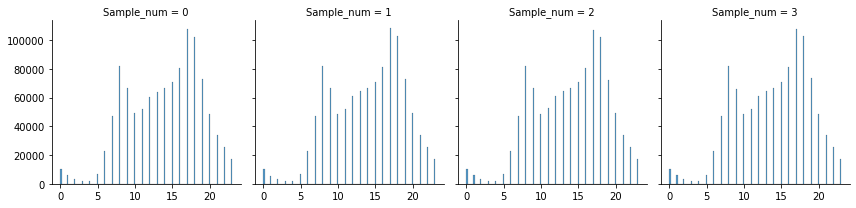

In [3]:
g = sns.FacetGrid(sample_df, col="Sample_num")
g.map_dataframe(sns.histplot, x='start_hour')

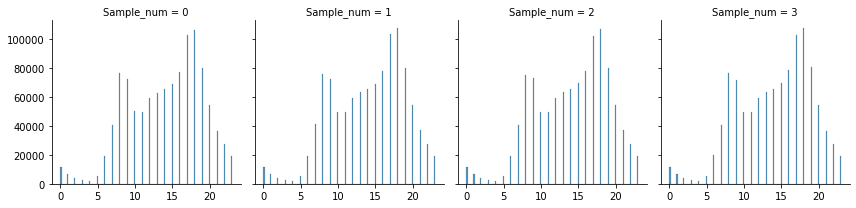

In [4]:
g = sns.FacetGrid(sample_df, col="Sample_num")
g.map_dataframe(sns.histplot, x='stop_hour') 

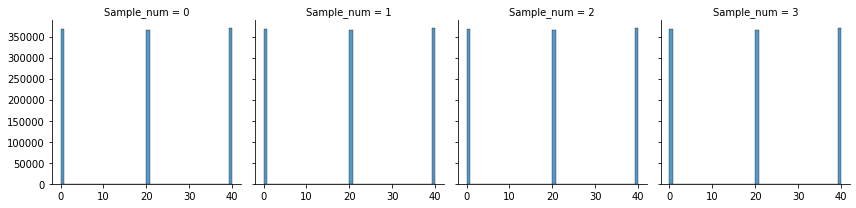

In [5]:
g = sns.FacetGrid(sample_df, col="Sample_num")
g.map_dataframe(sns.histplot, x='start_min')

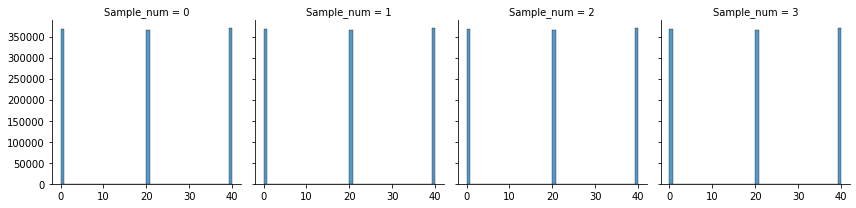

In [6]:
g = sns.FacetGrid(sample_df, col="Sample_num")
g.map_dataframe(sns.histplot, x='stop_min')